In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: JNJ
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


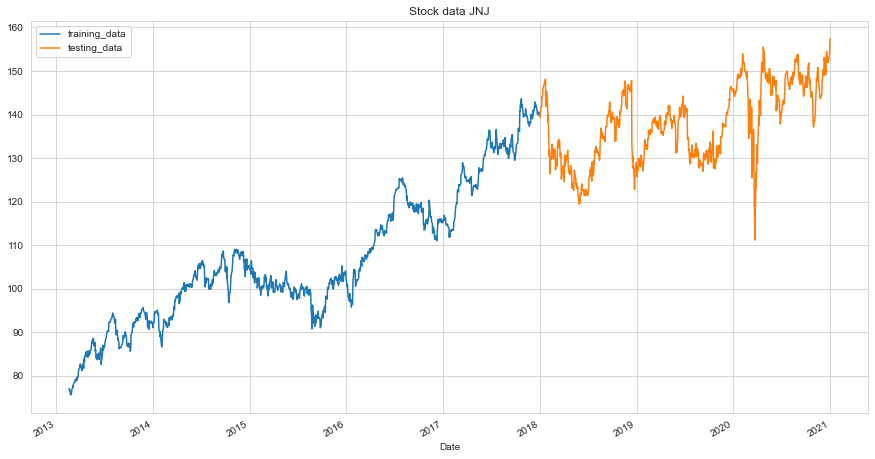

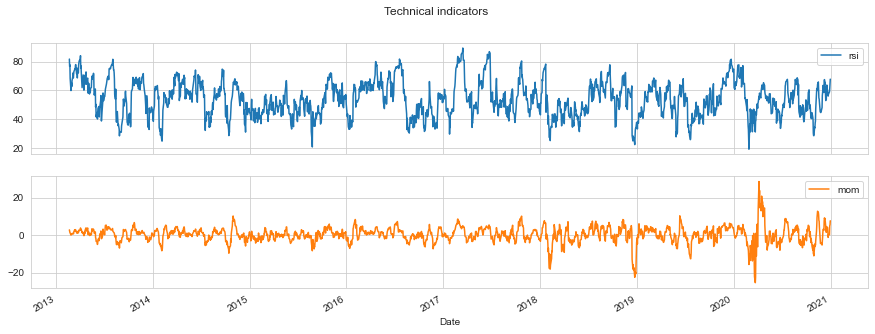

In [2]:
stock_name = 'jnj'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1253.10, duration: 0:00:00.437096
episode: 2/2000, episode end value: 1262.52, duration: 0:00:00.423097
episode: 3/2000, episode end value: 1276.04, duration: 0:00:00.399092
episode: 4/2000, episode end value: 1260.03, duration: 0:00:00.327074
episode: 5/2000, episode end value: 1261.21, duration: 0:00:00.354081
episode: 6/2000, episode end value: 1258.25, duration: 0:00:00.326078
episode: 7/2000, episode end value: 1281.09, duration: 0:00:00.284063
episode: 8/2000, episode end value: 1262.68, duration: 0:00:00.314076
episode: 9/2000, episode end value: 1257.82, duration: 0:00:00.292063
episode: 10/2000, episode end value: 1289.80, duration: 0:00:00.272061
episode: 11/2000, episode end value: 1256.85, duration: 0:00:00.278064
episode: 12/2000, episode end value: 1283.25, duration: 0:00:00.291065
episode: 13/2000, episode end value: 1251.52, duration: 0:00:00.266056
episode: 14/2000, episode end value: 1269.07, duration: 0:00:00.270062
episode: 15/200

episode: 117/2000, episode end value: 1221.46, duration: 0:00:00.407096
episode: 118/2000, episode end value: 1281.20, duration: 0:00:00.412094
episode: 119/2000, episode end value: 1284.35, duration: 0:00:00.363080
episode: 120/2000, episode end value: 1262.31, duration: 0:00:00.394089
episode: 121/2000, episode end value: 1252.31, duration: 0:00:00.453104
episode: 122/2000, episode end value: 1215.18, duration: 0:00:00.481113
episode: 123/2000, episode end value: 1261.65, duration: 0:00:00.450107
episode: 124/2000, episode end value: 1241.14, duration: 0:00:00.453105
episode: 125/2000, episode end value: 1220.57, duration: 0:00:00.439095
episode: 126/2000, episode end value: 1248.59, duration: 0:00:00.413098
episode: 127/2000, episode end value: 1263.56, duration: 0:00:00.453105
episode: 128/2000, episode end value: 1238.64, duration: 0:00:00.450099
episode: 129/2000, episode end value: 1230.57, duration: 0:00:00.448107
episode: 130/2000, episode end value: 1238.56, duration: 0:00:00

episode: 231/2000, episode end value: 1253.36, duration: 0:00:00.478105
episode: 232/2000, episode end value: 1252.12, duration: 0:00:00.475105
episode: 233/2000, episode end value: 1240.00, duration: 0:00:00.440098
episode: 234/2000, episode end value: 1253.77, duration: 0:00:00.415095
episode: 235/2000, episode end value: 1220.05, duration: 0:00:00.372085
episode: 236/2000, episode end value: 1269.05, duration: 0:00:00.412093
episode: 237/2000, episode end value: 1264.56, duration: 0:00:00.387089
episode: 238/2000, episode end value: 1248.93, duration: 0:00:00.343078
episode: 239/2000, episode end value: 1254.10, duration: 0:00:00.457101
episode: 240/2000, episode end value: 1242.04, duration: 0:00:00.454102
episode: 241/2000, episode end value: 1232.62, duration: 0:00:00.445102
episode: 242/2000, episode end value: 1278.25, duration: 0:00:00.431101
episode: 243/2000, episode end value: 1286.50, duration: 0:00:00.361082
episode: 244/2000, episode end value: 1254.89, duration: 0:00:00

episode: 345/2000, episode end value: 1284.97, duration: 0:00:00.402088
episode: 346/2000, episode end value: 1252.81, duration: 0:00:00.427094
episode: 347/2000, episode end value: 1250.49, duration: 0:00:00.386089
episode: 348/2000, episode end value: 1256.83, duration: 0:00:00.414093
episode: 349/2000, episode end value: 1275.17, duration: 0:00:00.416092
episode: 350/2000, episode end value: 1258.06, duration: 0:00:00.411091
episode: 351/2000, episode end value: 1256.37, duration: 0:00:00.429099
episode: 352/2000, episode end value: 1241.50, duration: 0:00:00.371084
episode: 353/2000, episode end value: 1258.22, duration: 0:00:00.424096
episode: 354/2000, episode end value: 1225.17, duration: 0:00:00.393089
episode: 355/2000, episode end value: 1253.55, duration: 0:00:00.420092
episode: 356/2000, episode end value: 1250.09, duration: 0:00:00.481107
episode: 357/2000, episode end value: 1235.77, duration: 0:00:00.430097
episode: 358/2000, episode end value: 1256.88, duration: 0:00:00

episode: 459/2000, episode end value: 1258.23, duration: 0:00:00.404097
episode: 460/2000, episode end value: 1244.24, duration: 0:00:00.449099
episode: 461/2000, episode end value: 1252.74, duration: 0:00:00.394083
episode: 462/2000, episode end value: 1241.48, duration: 0:00:00.444102
episode: 463/2000, episode end value: 1255.02, duration: 0:00:00.358081
episode: 464/2000, episode end value: 1245.12, duration: 0:00:00.406091
episode: 465/2000, episode end value: 1227.54, duration: 0:00:00.434097
episode: 466/2000, episode end value: 1251.56, duration: 0:00:00.443096
episode: 467/2000, episode end value: 1248.20, duration: 0:00:00.424100
episode: 468/2000, episode end value: 1247.49, duration: 0:00:00.406094
episode: 469/2000, episode end value: 1246.25, duration: 0:00:00.412097
episode: 470/2000, episode end value: 1230.97, duration: 0:00:00.443101
episode: 471/2000, episode end value: 1247.04, duration: 0:00:00.417096
episode: 472/2000, episode end value: 1236.02, duration: 0:00:00

episode: 573/2000, episode end value: 1259.54, duration: 0:00:00.388085
episode: 574/2000, episode end value: 1248.99, duration: 0:00:00.423095
episode: 575/2000, episode end value: 1237.08, duration: 0:00:00.398091
episode: 576/2000, episode end value: 1254.71, duration: 0:00:00.337073
episode: 577/2000, episode end value: 1281.61, duration: 0:00:00.392091
episode: 578/2000, episode end value: 1258.33, duration: 0:00:00.393091
episode: 579/2000, episode end value: 1251.33, duration: 0:00:00.479109
episode: 580/2000, episode end value: 1256.51, duration: 0:00:00.453100
episode: 581/2000, episode end value: 1254.22, duration: 0:00:00.468108
episode: 582/2000, episode end value: 1264.05, duration: 0:00:00.389087
episode: 583/2000, episode end value: 1254.55, duration: 0:00:00.436097
episode: 584/2000, episode end value: 1251.34, duration: 0:00:00.421096
episode: 585/2000, episode end value: 1255.58, duration: 0:00:00.471113
episode: 586/2000, episode end value: 1259.62, duration: 0:00:00

episode: 687/2000, episode end value: 1254.52, duration: 0:00:00.414092
episode: 688/2000, episode end value: 1256.55, duration: 0:00:00.447102
episode: 689/2000, episode end value: 1248.79, duration: 0:00:00.421098
episode: 690/2000, episode end value: 1250.67, duration: 0:00:00.376086
episode: 691/2000, episode end value: 1250.10, duration: 0:00:00.381086
episode: 692/2000, episode end value: 1239.28, duration: 0:00:00.389088
episode: 693/2000, episode end value: 1248.86, duration: 0:00:00.466105
episode: 694/2000, episode end value: 1249.22, duration: 0:00:00.411092
episode: 695/2000, episode end value: 1235.24, duration: 0:00:00.413099
episode: 696/2000, episode end value: 1255.17, duration: 0:00:00.331075
episode: 697/2000, episode end value: 1242.65, duration: 0:00:00.444101
episode: 698/2000, episode end value: 1262.11, duration: 0:00:00.409091
episode: 699/2000, episode end value: 1284.52, duration: 0:00:00.357081
episode: 700/2000, episode end value: 1258.49, duration: 0:00:00

episode: 801/2000, episode end value: 1237.58, duration: 0:00:00.406087
episode: 802/2000, episode end value: 1244.20, duration: 0:00:00.401095
episode: 803/2000, episode end value: 1236.75, duration: 0:00:00.403089
episode: 804/2000, episode end value: 1252.97, duration: 0:00:00.391088
episode: 805/2000, episode end value: 1239.34, duration: 0:00:00.446099
episode: 806/2000, episode end value: 1250.55, duration: 0:00:00.343082
episode: 807/2000, episode end value: 1248.57, duration: 0:00:00.347077
episode: 808/2000, episode end value: 1252.55, duration: 0:00:00.454104
episode: 809/2000, episode end value: 1240.61, duration: 0:00:00.407117
episode: 810/2000, episode end value: 1251.70, duration: 0:00:00.398091
episode: 811/2000, episode end value: 1242.14, duration: 0:00:00.433097
episode: 812/2000, episode end value: 1277.47, duration: 0:00:00.367082
episode: 813/2000, episode end value: 1251.54, duration: 0:00:00.445105
episode: 814/2000, episode end value: 1251.70, duration: 0:00:00

episode: 915/2000, episode end value: 1261.38, duration: 0:00:00.424094
episode: 916/2000, episode end value: 1258.13, duration: 0:00:00.501114
episode: 917/2000, episode end value: 1252.57, duration: 0:00:00.451105
episode: 918/2000, episode end value: 1284.87, duration: 0:00:00.401089
episode: 919/2000, episode end value: 1260.49, duration: 0:00:00.430098
episode: 920/2000, episode end value: 1258.47, duration: 0:00:00.491111
episode: 921/2000, episode end value: 1255.20, duration: 0:00:00.444103
episode: 922/2000, episode end value: 1249.90, duration: 0:00:00.493108
episode: 923/2000, episode end value: 1251.93, duration: 0:00:00.448103
episode: 924/2000, episode end value: 1257.51, duration: 0:00:00.416094
episode: 925/2000, episode end value: 1250.98, duration: 0:00:00.412093
episode: 926/2000, episode end value: 1249.37, duration: 0:00:00.459104
episode: 927/2000, episode end value: 1250.10, duration: 0:00:00.362083
episode: 928/2000, episode end value: 1251.72, duration: 0:00:00

episode: 1029/2000, episode end value: 1255.62, duration: 0:00:00.410091
episode: 1030/2000, episode end value: 1255.95, duration: 0:00:00.394093
episode: 1031/2000, episode end value: 1254.87, duration: 0:00:00.428096
episode: 1032/2000, episode end value: 1255.13, duration: 0:00:00.477106
episode: 1033/2000, episode end value: 1252.14, duration: 0:00:00.466103
episode: 1034/2000, episode end value: 1247.32, duration: 0:00:00.453102
episode: 1035/2000, episode end value: 1248.41, duration: 0:00:00.413092
episode: 1036/2000, episode end value: 1248.10, duration: 0:00:00.425096
episode: 1037/2000, episode end value: 1244.24, duration: 0:00:00.365081
episode: 1038/2000, episode end value: 1246.78, duration: 0:00:00.385087
episode: 1039/2000, episode end value: 1237.57, duration: 0:00:00.416094
episode: 1040/2000, episode end value: 1248.82, duration: 0:00:00.385086
episode: 1041/2000, episode end value: 1246.19, duration: 0:00:00.455103
episode: 1042/2000, episode end value: 1248.55, dur

episode: 1142/2000, episode end value: 1256.33, duration: 0:00:00.402091
episode: 1143/2000, episode end value: 1254.56, duration: 0:00:00.466107
episode: 1144/2000, episode end value: 1250.78, duration: 0:00:00.406168
episode: 1145/2000, episode end value: 1246.31, duration: 0:00:00.432098
episode: 1146/2000, episode end value: 1248.42, duration: 0:00:00.352080
episode: 1147/2000, episode end value: 1251.36, duration: 0:00:00.422097
episode: 1148/2000, episode end value: 1249.44, duration: 0:00:00.391087
episode: 1149/2000, episode end value: 1249.20, duration: 0:00:00.406088
episode: 1150/2000, episode end value: 1258.09, duration: 0:00:00.371087
episode: 1151/2000, episode end value: 1252.65, duration: 0:00:00.427095
episode: 1152/2000, episode end value: 1251.24, duration: 0:00:00.415092
episode: 1153/2000, episode end value: 1253.02, duration: 0:00:00.377091
episode: 1154/2000, episode end value: 1251.81, duration: 0:00:00.429095
episode: 1155/2000, episode end value: 1250.63, dur

episode: 1255/2000, episode end value: 1250.75, duration: 0:00:00.492112
episode: 1256/2000, episode end value: 1252.16, duration: 0:00:00.465106
episode: 1257/2000, episode end value: 1250.79, duration: 0:00:00.478112
episode: 1258/2000, episode end value: 1248.16, duration: 0:00:00.420095
episode: 1259/2000, episode end value: 1248.36, duration: 0:00:00.416094
episode: 1260/2000, episode end value: 1245.19, duration: 0:00:00.383083
episode: 1261/2000, episode end value: 1253.22, duration: 0:00:00.484108
episode: 1262/2000, episode end value: 1246.02, duration: 0:00:00.455104
episode: 1263/2000, episode end value: 1249.26, duration: 0:00:00.387088
episode: 1264/2000, episode end value: 1249.34, duration: 0:00:00.417100
episode: 1265/2000, episode end value: 1252.67, duration: 0:00:00.425098
episode: 1266/2000, episode end value: 1253.39, duration: 0:00:00.463105
episode: 1267/2000, episode end value: 1248.19, duration: 0:00:00.461110
episode: 1268/2000, episode end value: 1245.89, dur

episode: 1368/2000, episode end value: 1259.75, duration: 0:00:00.396090
episode: 1369/2000, episode end value: 1260.68, duration: 0:00:00.431097
episode: 1370/2000, episode end value: 1257.76, duration: 0:00:00.393089
episode: 1371/2000, episode end value: 1252.10, duration: 0:00:00.419095
episode: 1372/2000, episode end value: 1250.11, duration: 0:00:00.420093
episode: 1373/2000, episode end value: 1247.74, duration: 0:00:00.380087
episode: 1374/2000, episode end value: 1246.90, duration: 0:00:00.394084
episode: 1375/2000, episode end value: 1257.66, duration: 0:00:00.389088
episode: 1376/2000, episode end value: 1251.65, duration: 0:00:00.453100
episode: 1377/2000, episode end value: 1249.99, duration: 0:00:00.406098
episode: 1378/2000, episode end value: 1265.78, duration: 0:00:00.418093
episode: 1379/2000, episode end value: 1263.21, duration: 0:00:00.461102
episode: 1380/2000, episode end value: 1259.63, duration: 0:00:00.414092
episode: 1381/2000, episode end value: 1258.44, dur

episode: 1481/2000, episode end value: 1251.25, duration: 0:00:00.399091
episode: 1482/2000, episode end value: 1249.01, duration: 0:00:00.394086
episode: 1483/2000, episode end value: 1248.93, duration: 0:00:00.356081
episode: 1484/2000, episode end value: 1247.60, duration: 0:00:00.384086
episode: 1485/2000, episode end value: 1258.61, duration: 0:00:00.412093
episode: 1486/2000, episode end value: 1266.48, duration: 0:00:00.411098
episode: 1487/2000, episode end value: 1264.71, duration: 0:00:00.407088
episode: 1488/2000, episode end value: 1261.98, duration: 0:00:00.442100
episode: 1489/2000, episode end value: 1258.25, duration: 0:00:00.420093
episode: 1490/2000, episode end value: 1254.86, duration: 0:00:00.443101
episode: 1491/2000, episode end value: 1249.56, duration: 0:00:00.408094
episode: 1492/2000, episode end value: 1250.69, duration: 0:00:00.437098
episode: 1493/2000, episode end value: 1248.51, duration: 0:00:00.376084
episode: 1494/2000, episode end value: 1247.20, dur

episode: 1594/2000, episode end value: 1247.60, duration: 0:00:00.378085
episode: 1595/2000, episode end value: 1248.15, duration: 0:00:00.385085
episode: 1596/2000, episode end value: 1247.83, duration: 0:00:00.357083
episode: 1597/2000, episode end value: 1243.88, duration: 0:00:00.347078
episode: 1598/2000, episode end value: 1244.33, duration: 0:00:00.360079
episode: 1599/2000, episode end value: 1239.97, duration: 0:00:00.367085
episode: 1600/2000, episode end value: 1250.39, duration: 0:00:00.357082
episode: 1601/2000, episode end value: 1240.89, duration: 0:00:00.450103
episode: 1602/2000, episode end value: 1252.33, duration: 0:00:00.394087
episode: 1603/2000, episode end value: 1251.65, duration: 0:00:00.339078
episode: 1604/2000, episode end value: 1247.33, duration: 0:00:00.373079
episode: 1605/2000, episode end value: 1249.78, duration: 0:00:00.378087
episode: 1606/2000, episode end value: 1247.71, duration: 0:00:00.397092
episode: 1607/2000, episode end value: 1246.76, dur

episode: 1707/2000, episode end value: 1249.14, duration: 0:00:00.370599
episode: 1708/2000, episode end value: 1237.57, duration: 0:00:00.373309
episode: 1709/2000, episode end value: 1253.84, duration: 0:00:00.328071
episode: 1710/2000, episode end value: 1256.87, duration: 0:00:00.390428
episode: 1711/2000, episode end value: 1256.34, duration: 0:00:00.391858
episode: 1712/2000, episode end value: 1254.91, duration: 0:00:00.373711
episode: 1713/2000, episode end value: 1251.71, duration: 0:00:00.440100
episode: 1714/2000, episode end value: 1249.83, duration: 0:00:00.368082
episode: 1715/2000, episode end value: 1250.04, duration: 0:00:00.420097
episode: 1716/2000, episode end value: 1248.32, duration: 0:00:00.426093
episode: 1717/2000, episode end value: 1247.32, duration: 0:00:00.420100
episode: 1718/2000, episode end value: 1249.34, duration: 0:00:00.437218
episode: 1719/2000, episode end value: 1239.85, duration: 0:00:00.409469
episode: 1720/2000, episode end value: 1245.62, dur

episode: 1820/2000, episode end value: 1247.04, duration: 0:00:00.364077
episode: 1821/2000, episode end value: 1250.08, duration: 0:00:00.331075
episode: 1822/2000, episode end value: 1246.92, duration: 0:00:00.320073
episode: 1823/2000, episode end value: 1248.20, duration: 0:00:00.331077
episode: 1824/2000, episode end value: 1246.45, duration: 0:00:00.384083
episode: 1825/2000, episode end value: 1248.23, duration: 0:00:00.371083
episode: 1826/2000, episode end value: 1247.60, duration: 0:00:00.324076
episode: 1827/2000, episode end value: 1246.75, duration: 0:00:00.380084
episode: 1828/2000, episode end value: 1247.45, duration: 0:00:00.374086
episode: 1829/2000, episode end value: 1248.21, duration: 0:00:00.443975
episode: 1830/2000, episode end value: 1248.05, duration: 0:00:00.419551
episode: 1831/2000, episode end value: 1246.72, duration: 0:00:00.393152
episode: 1832/2000, episode end value: 1247.10, duration: 0:00:00.428097
episode: 1833/2000, episode end value: 1247.54, dur

episode: 1933/2000, episode end value: 1266.84, duration: 0:00:00.318073
episode: 1934/2000, episode end value: 1263.10, duration: 0:00:00.355079
episode: 1935/2000, episode end value: 1267.91, duration: 0:00:00.387091
episode: 1936/2000, episode end value: 1254.36, duration: 0:00:00.413096
episode: 1937/2000, episode end value: 1251.71, duration: 0:00:00.319075
episode: 1938/2000, episode end value: 1248.30, duration: 0:00:00.311067
episode: 1939/2000, episode end value: 1248.48, duration: 0:00:00.341076
episode: 1940/2000, episode end value: 1246.74, duration: 0:00:00.317069
episode: 1941/2000, episode end value: 1249.40, duration: 0:00:00.296066
episode: 1942/2000, episode end value: 1245.80, duration: 0:00:00.323071
episode: 1943/2000, episode end value: 1246.35, duration: 0:00:00.367083
episode: 1944/2000, episode end value: 1247.94, duration: 0:00:00.325074
episode: 1945/2000, episode end value: 1250.52, duration: 0:00:00.381080
episode: 1946/2000, episode end value: 1251.24, dur

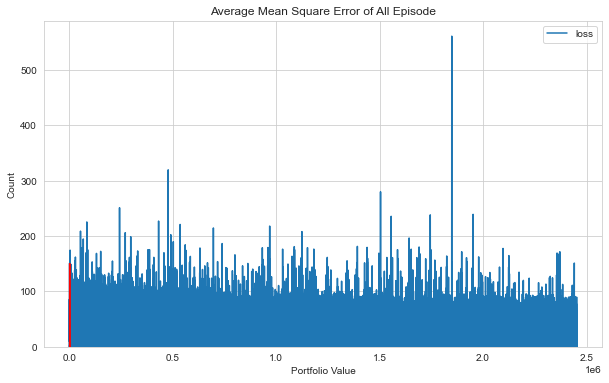

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

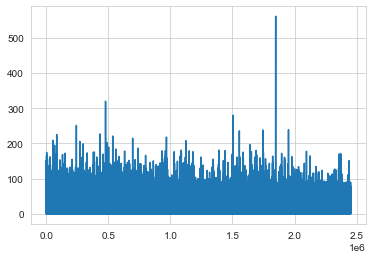

In [5]:
plt.plot(agent.model.losses)

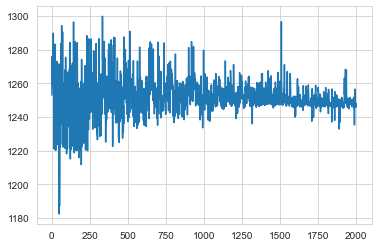

In [6]:
plt.plot(portfolio_value)

episode end value: 1133.56, duration: 0:00:00.119026
Sell: 400 times, Buy: 351 times


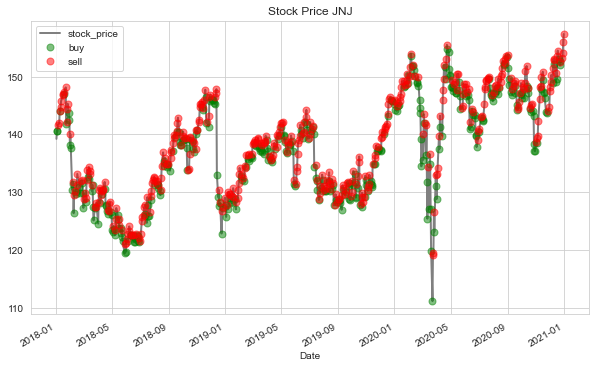

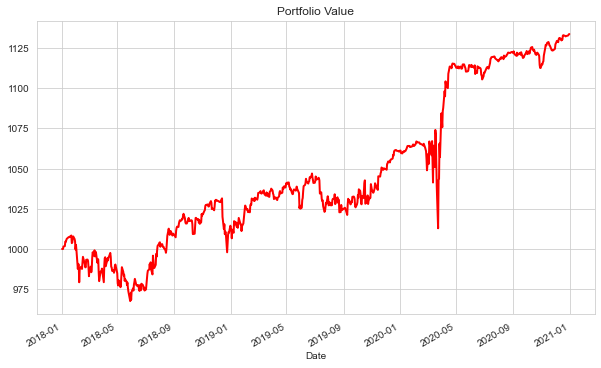

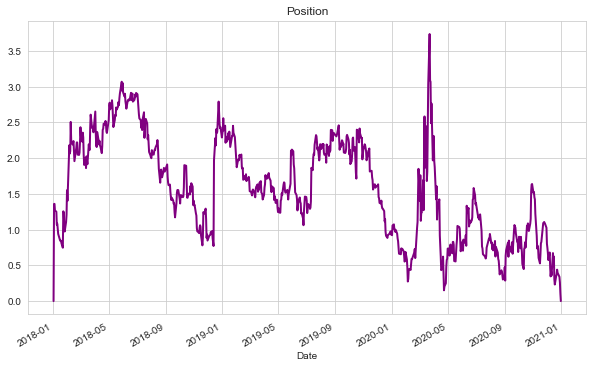

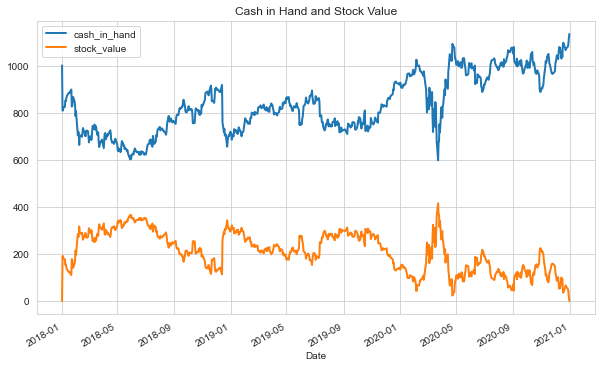

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: JNJ
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.27 %
Volatility: 0.0582
shape ratio: 0.5438
Maximun drawdown: -5.69 %
Calmar ratio: 0.7500
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 4.17 %
Volatility (benchmark): 0.2363
shape ratio: 0.1299
Maximun drawdown: -27.83 %
Calmar ratio (benchmark): 0.1498


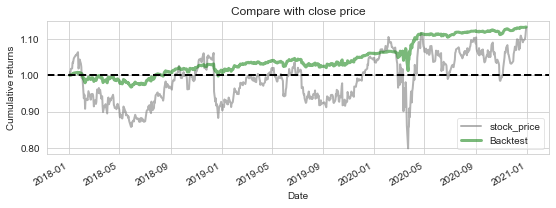

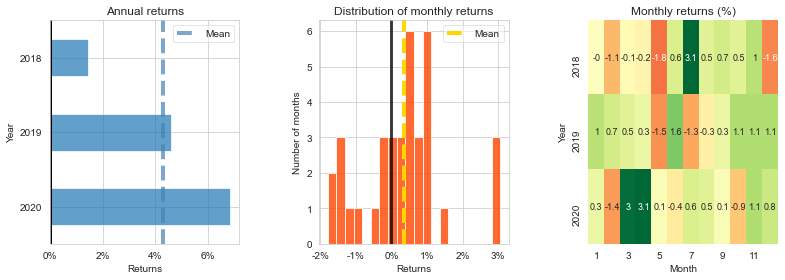

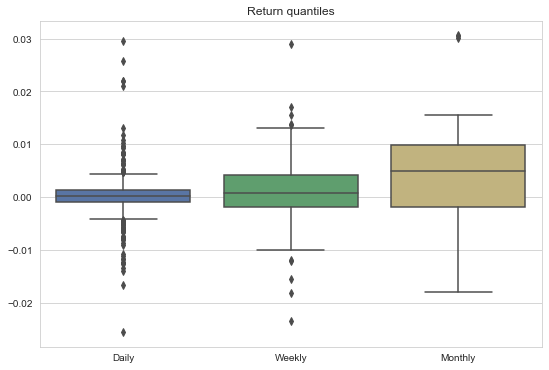

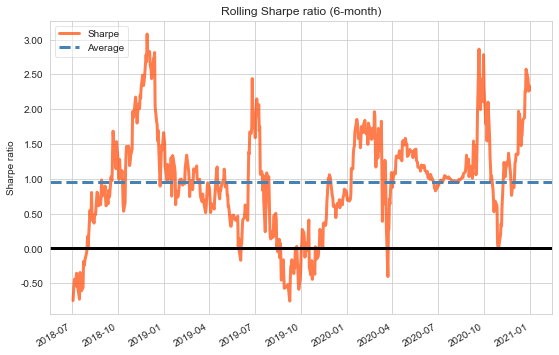

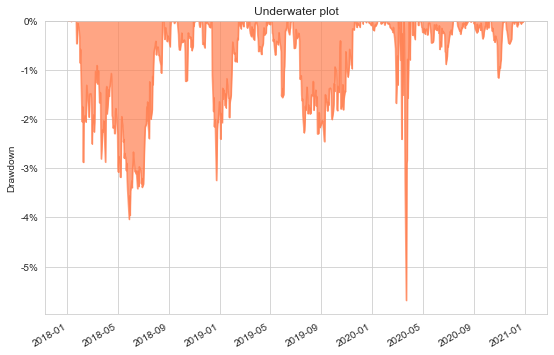

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')